# Building and Visualizing word frequencies


In our goal of tweet sentiment analysis, this function will build a dictionary where we can lookup how many times a word appears in the lists of positive or negative tweets. This will be very helpful when extracting the features of the dataset.

## Setup

In [39]:
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np   
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string

## Look at the preprocessed Dataset

In [40]:
from nltk.corpus import twitter_samples

In [41]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [42]:
# importing process_tweet function from utils folder
import sys  
sys.path.insert(0, 'D:/Jan July 2023/NLP/Code')

In [43]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                            reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)


In [44]:
# length of tweets?
pos_len=len(positive_tweets)
neg_len=len(negative_tweets)

In [45]:
# print length
neg_len

5000

In [46]:
# total tweets
tweets= positive_tweets + negative_tweets

In [47]:
# display random tweets
tweets[np.random.randint(0,10000)]

"@AireyFlamsteed [ also .... I Kath'd you earlier, you never responded :( ]"

In [48]:
tweets[5003]

'“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too'

In [49]:
# clean the tweets
clean_tweets= [process_tweet(tweet) for tweet in tweets]

In [50]:
clean_tweets[5003]

#### Import some helper functions that we provided in the utils.py file:
* `process_tweet()`: Cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
* `build_freqs()`: This counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label `1` or a negative label `0`. It then builds the `freqs` dictionary, where each key is a `(word,label)` tuple, and the value is the count of its frequency within the corpus of tweets.

 ## Build labels for positive and negative tweets

The `labels` array will be composed of 10000 elements. The first 5000 will be filled with `1` labels denoting positive sentiments, and the next 5000 will be `0` labels denoting the opposite. We can do this easily with a series of operations provided by the `numpy` library:

* `np.ones()` - create an array of 1's
* `np.zeros()` - create an array of 0's
* `np.append()` - concatenate arrays

In [51]:
# create labels for positive and negative tweets
y= np.append(np.ones((pos_len)),np.zeros((neg_len)))

In [52]:
# print lables
y

array([1., 1., 1., ..., 0., 0., 0.])

In [53]:
# print labels
y.size

10000

## Dictionaries

In Python, a dictionary is a mutable and indexed collection. It stores items as key-value pairs and uses [hash tables](https://en.wikipedia.org/wiki/Hash_table) underneath to allow practically constant time lookups. In NLP, dictionaries are essential because it enables fast retrieval of items or containment checks even with thousands of entries in the collection.

### Definition

A dictionary in Python is declared using curly brackets. Look at the next example:

In [54]:
# create a dictionary
d= {'Pen':3, 'laptop': 2, 'watch': 4}

In [55]:
# Assign new data to the dictionary
d['bottle'] =2

In [56]:
d

{'Pen': 3, 'laptop': 2, 'watch': 4, 'bottle': 2}

### Accessing values and lookup keys

Performing dictionary lookups and retrieval are common tasks in NLP. There are two ways to do this: 

* Using square bracket notation: This form is allowed if the lookup key is in the dictionary. It produces an error otherwise.
* Using the [get()](https://docs.python.org/3/library/stdtypes.html#dict.get) method: This allows us to set a default value if the dictionary key does not exist. 

Let us see these in action:

In [57]:
# Square bracket lookup when the key exist
d.get('pen', 0)

0

In [58]:
d.get('pen',-1)

-1

However, if the key is missing, the operation produce an error

In [59]:
# if item doesnot exit


When using a square bracket lookup, it is common to use an if-else block to check for containment first (with the keyword `in`) before getting the item. On the other hand, you can use the `.get()` method if you want to set a default value when the key is not found. Let's compare these in the cells below:

In [60]:
# use get function

## Word frequency dictionary

In [61]:
# check clean_tweets and labels
clean_tweets[0]

In [62]:
import numpy as np
a = [['hi', ':)'], [':(', 'No'], [':(', 'happy']]
b = np.array([1,0,1])

x = zip(a, b)
freq={}
# for tweet,y in x:
#     print(tweet,y)
#     for word in tweet:
#         key= (word, y)
#         if key not in freq:
#             freq[key] = 1
#         else:
#             freq[key] += 1
       
# for tweet,y in x:
# #     print(tweet,y)
#     for word in tweet:
#         key= (word, y)
#         freq[key] = freq.get(key,0) + 1
# freq

Now that we know the building blocks, let's finally take a look at the **build_freqs()** function in **utils.py**. This is the function that creates the dictionary containing the word counts from each corpus.

In [63]:
print(clean_tweets[0])
print(y[0])

None
1.0


In [64]:
def build_freqs(tweets, ys):
    # Convert np array to list since zip needs an iterable. The squeeze is necessary or the list ends up with one element.
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1 
             
    return freqs

In [65]:
freqs = build_freqs(clean_tweets,y)

TypeError: 'NoneType' object is not iterable

In [ ]:
freqs

{(None, 1.0): 50000000, (None, 0.0): 50000000}

In [ ]:
# sort the dictionary
sorted_freqs = sorted(freqs.items(), key=lambda x: (x[0][1], x[1]), reverse=True)

In [ ]:
sorted_freqs

[((None, 1.0), 50000000), ((None, 0.0), 50000000)]

In [ ]:
top= [items for items in sorted_freqs if items[0][1]==0]

In [ ]:
top[:5]

[((None, 0.0), 50000000)]

In [ ]:
top= [items for items in sorted_freqs if items[0][1]==1]
top[:5]

[((None, 1.0), 50000000)]

As shown above, each key is a 2-element tuple containing a `(word, y)` pair. The `word` is an element in a processed tweet while `y` is an integer representing the corpus: `1` for the positive tweets and `0` for the negative tweets. The value associated with this key is the number of times that word appears in the specified corpus. For example: 

``` 
# "folowfriday" appears 25 times in the positive tweets
('followfriday', 1.0): 25

# "shame" appears 19 times in the negative tweets
('shame', 0.0): 19 
```

## Table of word counts

We will select a set of words that we would like to visualize. It is better to store this temporary information in a table that is very easy to use later.

In [ ]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

data = []
for word in keys:
    pos = 0
    neg = 0
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    data.append([word, pos, neg])

We can then use a scatter plot to inspect this table visually. Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. `:)` has 3568 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral. 

In [ ]:
print(data)

[['happi', 0, 0], ['merri', 0, 0], ['nice', 0, 0], ['good', 0, 0], ['bad', 0, 0], ['sad', 0, 0], ['mad', 0, 0], ['best', 0, 0], ['pretti', 0, 0], ['❤', 0, 0], [':)', 0, 0], [':(', 0, 0], ['😒', 0, 0], ['😬', 0, 0], ['😄', 0, 0], ['😍', 0, 0], ['♛', 0, 0], ['song', 0, 0], ['idea', 0, 0], ['power', 0, 0], ['play', 0, 0], ['magnific', 0, 0]]


In [ ]:
# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0) i.e., Laplacian smoothing
x = np.log([x[1] + 1 for x in data])  
y = np.log([x[2] + 1 for x in data]) 
print(x)
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Using log count to reduce the scale of the graph

/home/volt/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


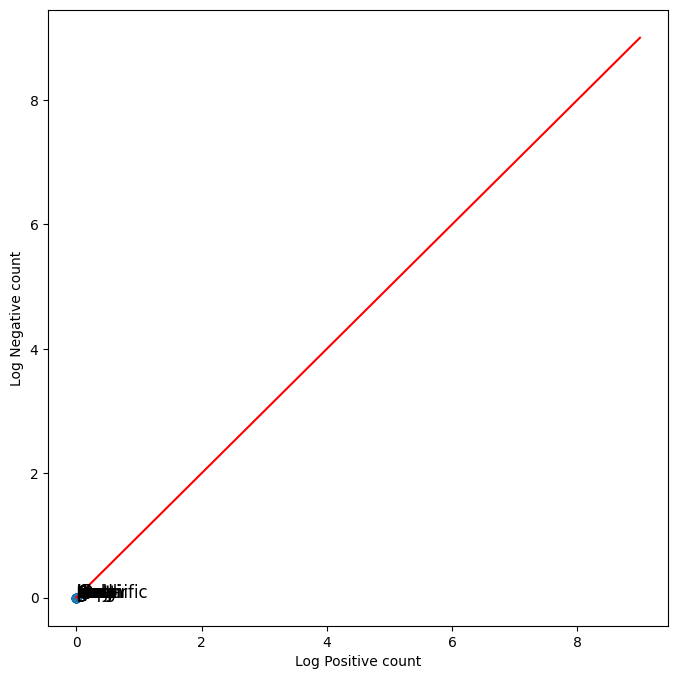

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
# Plot a dot for each pair of words
ax.scatter(x, y)  
# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

This chart is straightforward to interpret. It shows that emoticons `:)` and `:(` are very important for sentiment analysis. Thus, we should not let preprocessing steps get rid of these symbols!
